<a href="https://colab.research.google.com/github/Mobad225/LDA-and-K-means/blob/master/sheet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import math
u1 = np.array([[3], [4] ,[0]])
u2 = np.array([[-4], [3] ,[0]])

# Show that both vectors are orthogonal

In [246]:
cos = u1.T.dot(u2)
print(cos)

[[0]]


Cos(theta) = $\frac{U_{1} . U_{2}}{|U_{1} | . | U_{2}|}$, Since $U_{1}$ . $U_{2}$ = 0, Then Cos(Theta) = 0 and they are orthogonal

# Find the projection on $U_{1}$ and $U_{2}$

In [247]:
y = np.array([[6], [3], [-2]])
# Normalize U1 and U2
u1_unit = u1 / np.linalg.norm(u1)
u2_unit = u2 / np.linalg.norm(u2)
print("Projection on U1")
proj_y_u1 = u1_unit.T.dot(y) * u1_unit
print(proj_y_u1, "Projection on U2",sep = '\n\n')
proj_y_u2 = u2_unit.T.dot(y) * u2_unit
print(proj_y_u2)

Projection on U1
[[3.6]
 [4.8]
 [0. ]]

Projection on U2
[[ 2.4]
 [-1.8]
 [-0. ]]


# LDA

In [0]:
import pandas as pd
data1 = np.array([(2, 3, 3, 5, 7),(3, 3, 4, 8, 7)]).T
data2 = np.array([(5, 6, 7, 7, 8, 9),(4, 5, 4, 5, 2, 4)]).T

## Find M1 , M2 & Between-class Scatter Matrix 

In [249]:
mean1 = data1.mean(0)
mean2 = data2.mean(0)
print('M1 = ', mean1, '\tM2 = ', mean2, end = '\n\n')
diff = np.matrix(mean1 - mean2)
B = diff.T.dot(diff)
print('Between-class Scatter Matrix : ', B, sep = '\n')

M1 =  [4. 5.] 	M2 =  [7. 4.]

Between-class Scatter Matrix : 
[[ 9. -3.]
 [-3.  1.]]


# Find best direction w, Sketch it

In [0]:
S_inv = np.matrix('0.056, -0.029; -0.029, 0.052')
A = S_inv.dot(B)
e_vals, e_vects = np.linalg.eig(A)
e_vects = e_vects
idx = e_vals.argsort()[::-1]   
e_vals = e_vals[idx]
e_vects = e_vects[:,idx]
dim = e_vects[:,:1]

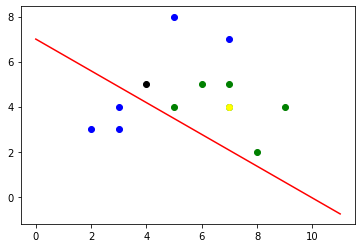

In [251]:
import matplotlib.pyplot as plt
dim = np.array(dim)
origin = [0], [0]
x = np.linspace(0, 11, 1000)
y = (dim[1]/ dim[0]) * x;
plt.scatter(data1[: , 0], data1[: ,1], c = 'b')
plt.scatter(data2[: , 0], data2[: ,1], c = 'g')
plt.scatter(mean1[0], mean1[1], c = 'black')
plt.scatter(mean2[0], mean2[1], c = 'yellow')
plt.plot(x, y + 7, c = 'r')
plt.show()
plt.close()

# Question 3) LDA (Midterm)

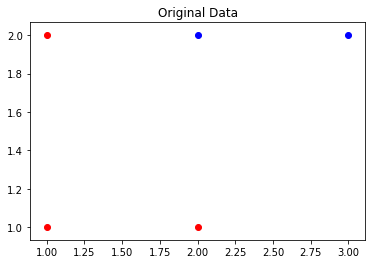

In [252]:
data1 = np.array([(1, 2, 1),(1, 1, 2)]).T
data2 = np.array([(2, 3),(2, 2)]).T
plt.scatter(data1[:,0], data1[:,1], color = 'r')
plt.scatter(data2[:,0], data2[:,1], color = 'b')
plt.title('Original Data')
plt.show()
plt.close()

In [0]:
mean1, mean2 = data1.mean(0), data2.mean(0)
#Computing Between-class scatter Matrix 'B'
diff = np.matrix(mean1 - mean2).T
B = diff.dot(diff.T)
#Computing Within-class scatter Matrix 'S'
#First center the data
data1_centered, data2_centered = np.zeros_like(data1).astype(float), np.zeros_like(data2).astype(float)
for i in range(len(data1)):
  data1_centered[i] = data1[i] - mean1
for i in range(len(data2)):
  data2_centered[i] = data2[i] - mean2
S1 = data1_centered.T.dot(data1_centered)
S2 = data2_centered.T.dot(data2_centered)
S = S1 + S2
#Get S inverse
S_inv = np.linalg.inv(S)
#Get S_inv * B, and solve for largest eigenvalue
A = S_inv.dot(B)
v, w = np.linalg.eig(A)
idx = v.argsort()[::-1]   
v = v[idx]
w = w[:,idx]
best_w = np.array(w[:,0])

## Printing data + direction that splits the data

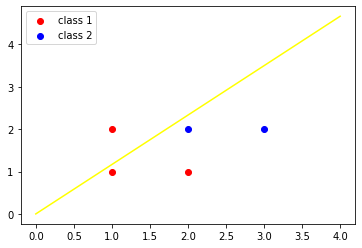

In [254]:
plt.scatter(data1[:,0], data1[:,1], color = 'r', label = 'class 1')
plt.scatter(data2[:,0], data2[:,1], color = 'b', label = 'class 2')
x = np.linspace(0, 4, 1000)
y = (best_w[1]/ best_w[0]) * x;
plt.plot(x, y, color = 'yellow')
plt.legend()
plt.show()
plt.close()

### a) $M_{1}$ and $M_{2}$ and B

In [255]:
print('Mean1 : ', mean1, ' & Mean2 = ', mean2, end = '\n\n')
print('Between-class Scatter Matrix :', B, sep = '\n')

Mean1 :  [1.33333333 1.33333333]  & Mean2 =  [2.5 2. ]

Between-class Scatter Matrix :
[[1.36111111 0.77777778]
 [0.77777778 0.44444444]]


### b) $S_{1}$, $S_{2}$ and Within-Class Scatter Matrix 'S'

In [256]:
print('S1 : ', S1, 'S2 :', S2, 'S :', S, sep = '\n')

S1 : 
[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
S2 :
[[0.5 0. ]
 [0.  0. ]]
S :
[[ 1.16666667 -0.33333333]
 [-0.33333333  0.66666667]]


### c) Drawing the direction is done above.

# K-means Clustering

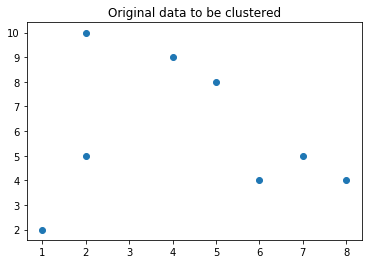

In [257]:
from collections import defaultdict
data = np.array([(2, 2, 8, 5, 7, 6, 1, 4),(10, 5, 4, 8, 5, 4, 2, 9)]).T
plt.scatter(data[:,0], data[:,1])
plt.title('Original data to be clustered')
plt.show()
plt.close()

Clusters shown, And the means are shown in black


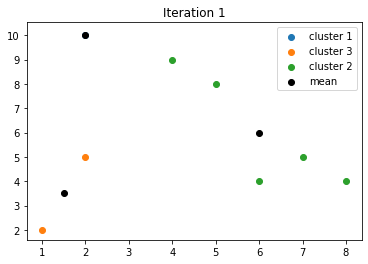

Clusters shown, And the means are shown in black


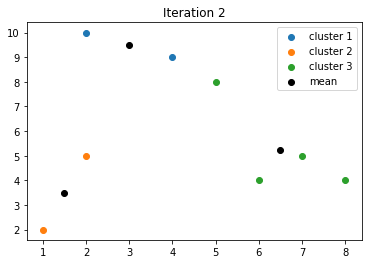

Clusters shown, And the means are shown in black


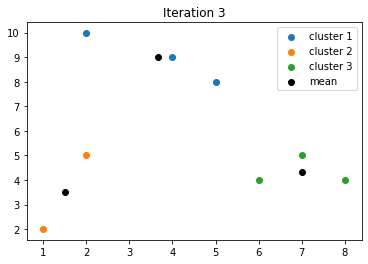

Clusters shown, And the means are shown in black


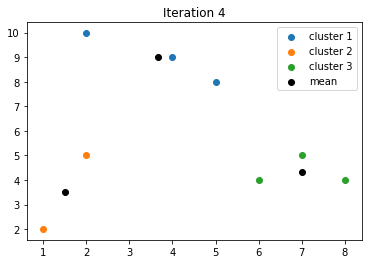

For error converge to less than 0.01, it took 4 iterations!


In [258]:
eps , centroids, error, cnt_it= 0.01, [np.array([2, 10]), np.array((5, 8)), np.array((1, 2))], 1, 0
while error > eps:
  cnt_it, dct, means = cnt_it+1, defaultdict(list), np.zeros(shape = (3,2))
  print('Clusters shown, And the means are shown in black')
  for i in range(len(data)):
    best, arg = 1000, -1
    for j in range(len(centroids)):
      dist = np.linalg.norm(data[i] - centroids[j])
      if dist < best:
        best, arg = dist, j
    dct[arg].append(i)
  error = 0
  ls_new = []
  for k, v in dct.items():
    cnt, tot = len(v), np.zeros_like(data[0])
    for i in range(len(v)):
      tot = tot + data[v[i]]
    new_mean = tot / cnt
    error += np.linalg.norm(centroids[k] - new_mean)
    ls_new.append(new_mean)
    my_data, means[k] = data[v], new_mean
    plt.scatter(my_data[:,0], my_data[:,1], label = 'cluster {}'.format(k + 1))
  centroids= ls_new
  plt.scatter(means[:,0], means[:,1], color = 'black', label = 'mean') 
  plt.title('Iteration %d' % cnt_it)
  plt.legend()
  plt.show()
  plt.close()
print('For error converge to less than 0.01, it took %d iterations!' % cnt_it)